In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/workspaces/StrataScratchDataProjects/Inflation Expectations Analysis/T10YIE.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  1305 non-null   object 
 1   T10YIE            1250 non-null   float64
dtypes: float64(1), object(1)
memory usage: 20.5+ KB


In [5]:
df.describe()

,T10YIE
count,1250.000000
mean,2.330344
std,0.200137
min,1.640000
25%,2.250000
50%,2.330000
75%,2.410000
max,3.020000


In [6]:
df.isnull().sum()

observation_date     0
T10YIE              55
dtype: int64

In [7]:
df['T10YIE'] = df['T10YIE'].fillna(method='ffill')

/tmp/ipykernel_1832/2698445669.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['T10YIE'] = df['T10YIE'].fillna(method='ffill')


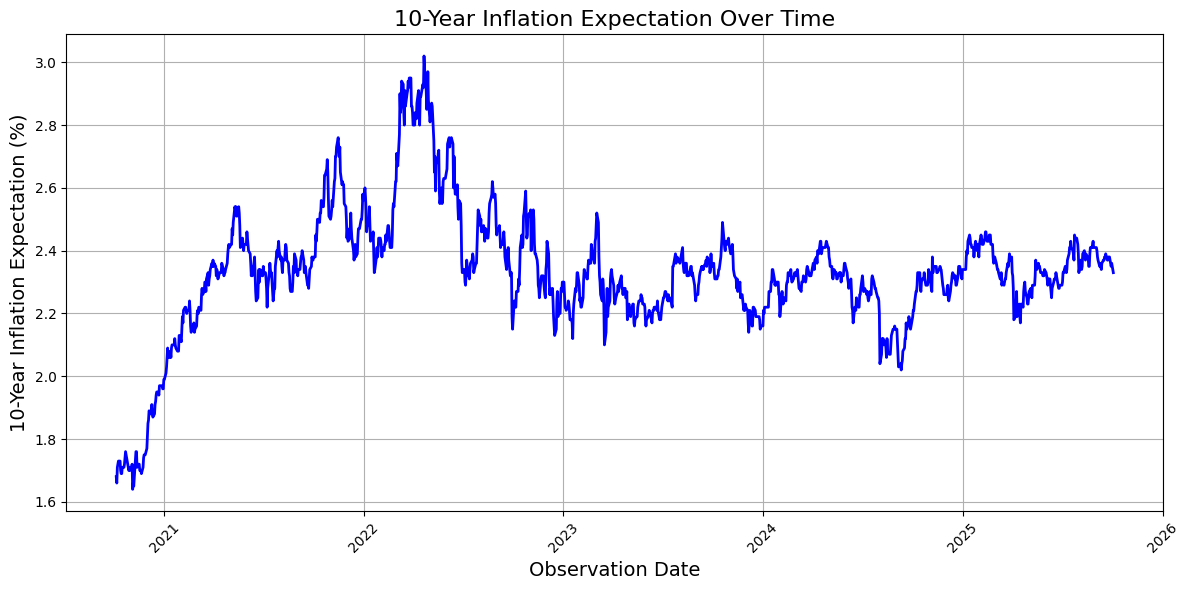

In [8]:
import matplotlib.dates as mdates
df['observation_date'] = pd.to_datetime(df['observation_date'],errors='coerce')

df_sorted = df.sort_values(by='observation_date')

plt.figure(figsize=(12, 6))
plt.plot(df_sorted['observation_date'], df_sorted['T10YIE'], color='blue', linewidth=2)
plt.title('10-Year Inflation Expectation Over Time', fontsize=16)
plt.xlabel('Observation Date', fontsize=14)
plt.ylabel('10-Year Inflation Expectation (%)', fontsize=14)
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
         

<h2><b>Interpretation:</b></h2>

<p>The time series plot shows <b>four distinct phases:</b></p>

<ul>
  <li><b>Late 2020–2021:</b> A sharp rise as post-pandemic recovery began.</li>
  <li><b>2022:</b> Peaks near 3% during the inflation surge and geopolitical tensions.</li>
  <li><b>2023:</b> Noticeable decline as monetary tightening took effect.</li>
  <li><b>2024–2025:</b> Stabilization near the Fed’s 2% target.</li>
</ul>

<p>This visualization provides the foundation for the upcoming <b>Trend Analysis Techniques</b> section.</p>


<h2><b>Technique 1: Moving Averages</b></h2>

<p>Moving averages smooth short-term fluctuations and help reveal underlying trends.</p>

<p>They are one of the simplest yet most effective tools in time series analysis—especially for financial data where daily volatility can obscure long-term direction.</p>

<p>A <b>30-day moving average</b> highlights recent shifts, while a <b>90-day moving average</b> captures broader structural trends.</p>

<p>Crossovers between short- and long-term averages often act as <b>early indicators of uptrends or downtrends</b>.</p>

<h3><b>Step 1: Concept and Purpose</b></h3>

<p>Moving averages reduce noise in daily data by averaging recent observations.</p>

<p>For a <b>30-day window</b>, each new point represents the mean of the previous 30 days.</p>

<p>This transformation produces a smoother line that exposes the underlying direction of change.</p>

<h3><b>Types of Moving Averages:</b></h3>

<ul>
  <li><b>Short-term MA (30 days):</b> Captures quick, recent movements.</li>
  <li><b>Long-term MA (90 days):</b> Shows slower, structural shifts.</li>
  <li><b>Crossovers:</b> When the short MA crosses above the long MA → potential uptrend signal.</li>
</ul>


Step 2: Implementation and Visualization

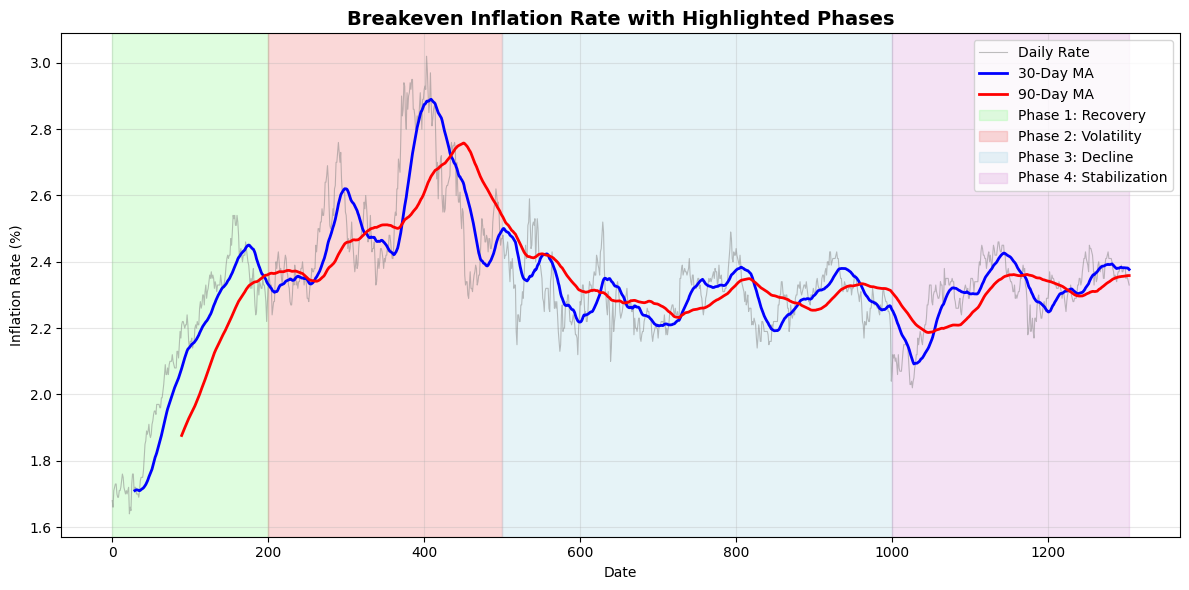

In [9]:
df['T10YIE'] = df['T10YIE'].ffill()
df['MA_30'] = df['T10YIE'].rolling(window=30).mean()
df['MA_90'] = df['T10YIE'].rolling(window=90).mean()

plt.figure(figsize=(12, 6))

plt.plot(df.index,df['T10YIE'],label="Daily Rate",alpha=0.5,linewidth=0.8,color='gray')
plt.plot(df.index,df["MA_30"],label="30-Day MA",linewidth=2,color='blue')
plt.plot(df.index,df["MA_90"],label="90-Day MA",linewidth=2,color='red')

plt.axvspan(0,200,color='palegreen',alpha=0.3,label="Phase 1: Recovery")
plt.axvspan(200,500,color='lightcoral',alpha=0.3,label="Phase 2: Volatility")
plt.axvspan(500,1000,color='lightblue',alpha=0.3,label="Phase 3: Decline")
plt.axvspan(1000,df.index[-1],color='plum',alpha=0.3,label="Phase 4: Stabilization")

plt.title('Breakeven Inflation Rate with Highlighted Phases', fontsize=14, fontweight='bold')
plt.ylabel('Inflation Rate (%)')
plt.xlabel('Date')
plt.grid(True, alpha=0.3)


plt.legend(loc='upper right')


plt.tight_layout()
plt.show()



<h2><b>Step 3: Interpretation</b></h2>

<p>The moving averages reveal distinct patterns across five years of inflation expectations.</p>

<h4><b>Phase 1: Sharp Recovery (Days 0–200)</b></h4>

<p>Both averages climb steeply from 1.7% to 2.4%. The 30-day MA rises faster.</p>

<p>This period captures the post-COVID economic reopening, where massive fiscal stimulus drove inflation expectations upward.</p>

<h4><b>Phase 2: High Volatility Period (Days 200–500)</b></h4>

<p>Daily rates spike to 3.0% around day 400. The 30-day MA reaches 2.9%.</p>

<p>This matches the 2022 inflation surge, marked by supply chain disruptions, Russia’s invasion of Ukraine, and energy price spikes.</p>

<h4><b>Phase 3: The Decline (Days 500–1000)</b></h4>

<p>The 30-day MA trends downward sharply, dropping to 2.2% near day 1000.</p>

<p>The Fed hiked rates aggressively through 2022–2023, cooling inflation expectations as monetary policy took effect.</p>

<h4><b>Phase 4: Recent Stabilization (Days 1000–1300)</b></h4>

<p>The 30-day MA hovers around 2.3–2.4% with minimal fluctuation.</p>

<p>Markets show confidence that inflation is stabilizing near the Fed’s 2% target as rate hikes pause.</p>

<h4><b>Key Insight:</b></h4>

<p>The 30-day MA captured every turning point early.</p>

<p>When it climbed sharply in early 2021, the inflation surge followed.</p>

<p>When it dropped in mid-2022, cooling began.</p>

<p>Current stability suggests markets believe the inflation shock has passed.</p>

<h2><b>Technique 2: Year-over-Year Change</b></h2>

<p>Year-over-year (YoY) change measures how today’s inflation expectations compare to the same day one year ago. It answers the question: <b>Are inflation expectations higher or lower than they were 12 months ago?</b></p>

<p>This approach removes short-term seasonality and highlights momentum — whether the trend is accelerating or decelerating.</p>

<p>Positive values indicate rising expectations, negative values show declining momentum, and zero represents stability.</p>

<p>In essence, YoY change captures <b>directional speed</b>, not just level.</p>

<h3><b>Interpretation Guide</b></h3>

<ul>
  <li><b>Positive YoY:</b> Inflation expectations are increasing vs last year.</li>
  <li><b>Negative YoY:</b> Expectations are cooling.</li>
  <li><b>Near zero:</b> Stable, anchored expectations.</li>
</ul>

<h2><b>Step 1: Concept and Formula</b></h2>

<p>The goal of this technique is to measure the <b>momentum</b> of inflation expectations rather than their absolute level.</p>

<p>By comparing the current value of the 10-Year Breakeven Inflation Rate (T10YIE) with its value exactly one year earlier, we can identify whether inflation sentiment is accelerating or decelerating over time.</p>

<h3><b>Concept Summary</b></h3>

<ul>
  <li>Year-over-year comparison highlights <b>sustained movements instead of daily noise</b>.</li>
  <li>It removes <b>short-term seasonality</b>, revealing underlying direction and speed.</li>
  <li>A positive YoY indicates <b


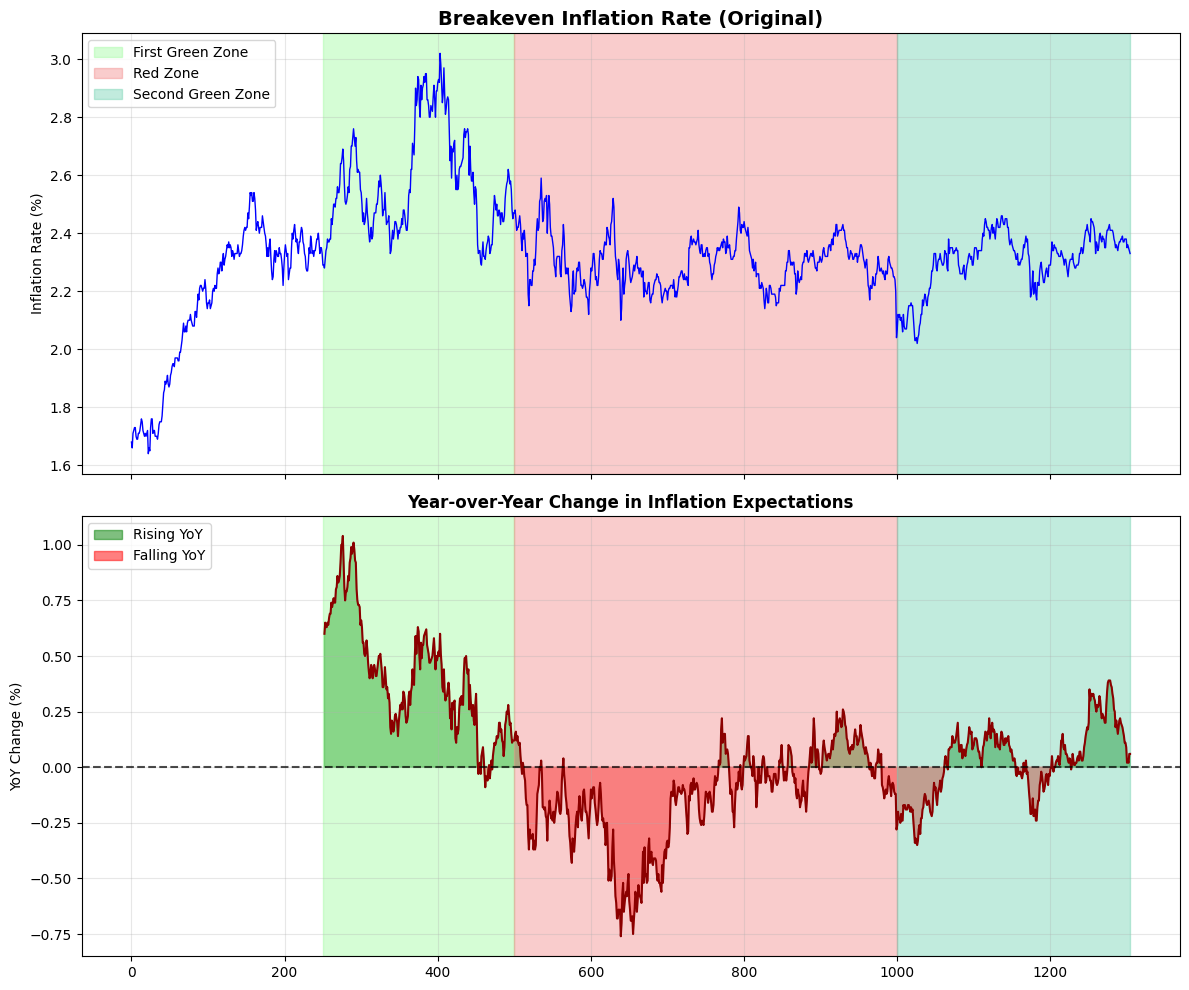

In [12]:
df['T10YIE'] = df['T10YIE'].ffill()
df['YoY_Change'] = df['T10YIE'].diff(252)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

ax1.plot(df.index, df['T10YIE'], color='blue', linewidth=1)
ax1.set_ylabel('Inflation Rate (%)')
ax1.set_title("Breakeven Inflation Rate (Original)", fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

ax2.plot(df.index, df['YoY_Change'], color='darkred', linewidth=1.5)
ax2.axhline(y=0, color='black', linestyle='--', linewidth=1.5, alpha=0.7)
ax2.fill_between(df.index, df['YoY_Change'], 0,
                 where=(df['YoY_Change'] > 0),
                 color='green', alpha=0.5, label='Rising YoY')
ax2.fill_between(df.index, df['YoY_Change'], 0,
                 where=(df['YoY_Change'] <= 0),
                 color='red', alpha=0.5, label='Falling YoY')
ax2.set_ylabel("YoY Change (%)")
ax2.set_title("Year-over-Year Change in Inflation Expectations",
              fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

# first green zone (Days 250–500)
ax1.axvspan(250, 500, color="palegreen", alpha=0.4, label="First Green Zone")
ax2.axvspan(250, 500, color="palegreen", alpha=0.4)

# red zone (Days 500–1000)
ax1.axvspan(500, 1000, color="lightcoral", alpha=0.4, label="Red Zone")
ax2.axvspan(500, 1000, color="lightcoral", alpha=0.4)

# second green zone (Days 1000–end)
ax1.axvspan(1000, df.index[-1], color="mediumaquamarine", alpha=0.4, label="Second Green Zone")
ax2.axvspan(1000, df.index[-1], color="mediumaquamarine", alpha=0.4)

ax1.legend(loc='upper left')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()


<h2><b>Step 3: Interpretation</b></h2>

<h3><b>Results & Interpretation</b></h3>

<p>The YoY change chart splits inflation expectations into <b>green and red zones</b>.
<b>Green means accelerating. Red means decelerating.</b>
This reveals momentum shifts that the original rate chart completely missed.</p>

<h4><b>First Green Zone (Days 250–500):</b></h4>

<p>Inflation expectations climbed fast. <b>Year-over-year changes peaked at +1.0%.</b>
This period corresponds to <b>2021–2022</b> when supply chains collapsed, stimulus checks flooded the economy, and the <b>Russia–Ukraine conflict drove energy prices higher</b>.</p>

<h4><b>Red Zone (Days 500–1000):</b></h4>

<p>Expectations crashed, falling to <b>−0.75% YoY</b>.
The <b>Federal Reserve hiked rates aggressively throughout 2022 and 2023</b>.
Markets correctly anticipated <b>cooling inflation expectations</b>.</p>

<h4><b>Second Green Zone (Days 1000–1300):</b></h4>

<p>Small positive changes returned, oscillating between <b>+0.1% and +0.3%</b>.
Expectations stopped falling and began <b>stabilizing above prior-year levels</b> — a sign of <b>normalization rather than renewed panic</b>.</p>

<h4><b>Signal for the Future:</b></h4>

<p>Recent green patches are <b>mild compared to the 2022 surge</b>.
YoY changes <b>below +0.25% suggest inflation expectations remain anchored</b>.
Sustained moves <b>above +0.5% would indicate renewed inflation concerns worth monitoring</b>.</p>

<h2><b>Technique 3: Bollinger Bands</b></h2>

<p>Bollinger Bands create an <b>upper and lower boundary around a moving average using standard deviation</b>.
The bands expand during <b>volatile periods</b> and contract during <b>calm ones</b>, making them an effective tool for visualizing <b>market stress vs stability</b>.</p>

<p>In this analysis, Bollinger Bands reveal when inflation expectations were <b>normal (inside bands)</b> versus <b>extreme (outside bands)</b>.
When the rate touches the <b>upper band</b>, it signals <b>unusually high inflation expectations</b>; when it touches the <b>lower band</b>, it indicates <b>unusually low expectations</b>.</p>

<h3><b>Structure</b></h3>

<ul>
  <li><b>Middle Band:</b> 20-day moving average</li>
  <li><b>Upper Band:</b> Middle + (2 × standard deviation)</li>
  <li><b>Lower Band:</b> Middle − (2 × standard deviation)</li>
</ul>

<p>Roughly <b>95% of the data should fall within this range</b>, allowing analysts to quickly identify <b>outliers and volatility spikes</b>.</p>

<h2><b>Step 1: Concept</b></h2>

<p>The goal of Bollinger Bands is to <b>measure volatility and identify deviations from the average trend</b>.
They form a <b>dynamic range</b> based on both <b>mean and variability</b>, making them particularly useful for <b>financial time series</b> like inflation expectations.</p>

<h3><b>Concept Summary</b></h3>

<ul>
  <li>When <b>volatility rises</b>, the bands <b>widen</b> — showing uncertainty or strong market reactions.</li>
  <li>When <b>volatility falls</b>, the bands <b>tighten</b> — signaling stability or consensus.</li>
  <li>Values <b>outside the bands</b> represent <b>extreme behavior</b>, while values <b>inside</b> are considered <b>normal</b>.</li>
</ul>

<p><b>In the context of the 10-Year Breakeven Inflation Rate (T10YIE):</b></p>

<ul>
  <li><b>Upper band breaches</b> → periods of strong inflation sentiment or panic</li>
  <li><b>Lower band touches</b> → unusually low inflation expectations or deflation fears</li>
</ul>

<h2><b>Step 2: Implementation</b></h2>


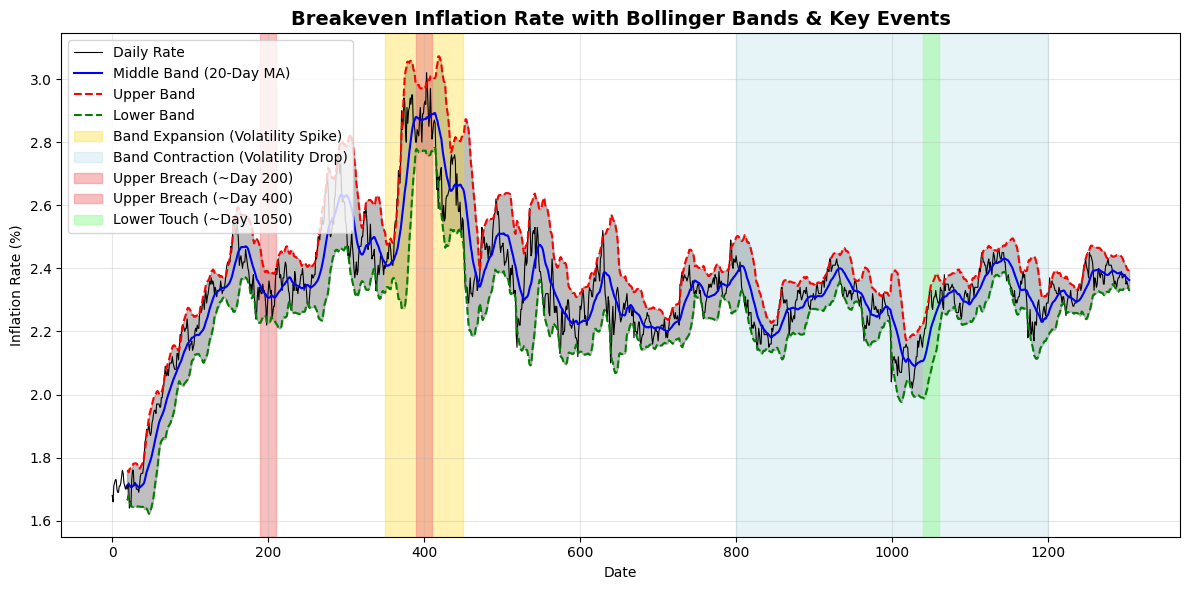

In [13]:
df['T10YIE'].ffill()

window = 20

df['BB_Middle'] = df['T10YIE'].rolling(window=window).mean()
df['BB_Std'] = df['T10YIE'].rolling(window=window).std()
df['BB_Upper'] = df['BB_Middle'] + (2 * df['BB_Std'])
df['BB_Lower'] = df['BB_Middle'] - (2 * df['BB_Std'])

plt.figure(figsize=(12, 6))

plt.plot(df.index,df['T10YIE'],label="Daily Rate",color='black',linewidth=0.8)
plt.plot(df.index,df['BB_Middle'],label="Middle Band (20-Day MA)",color='blue',linewidth=1.5)
plt.plot(df.index,df['BB_Upper'],label="Upper Band",color='red',linewidth=1.5,linestyle='--')
plt.plot(df.index,df['BB_Lower'],label="Lower Band",color='green',linewidth=1.5,linestyle='--')
plt.fill_between(df.index, df['BB_Lower'], df['BB_Upper'], color='gray', alpha=0.5)

plt.axvspan(350,450,color='gold',alpha=0.3,label="Band Expansion (Volatility Spike)")
plt.axvspan(800,1200,color='lightblue',alpha=0.3,label="Band Contraction (Volatility Drop)")
plt.axvspan(190, 210, color='lightcoral', alpha=0.5, label='Upper Breach (~Day 200)')
plt.axvspan(390, 410, color='lightcoral', alpha=0.5, label='Upper Breach (~Day 400)')

plt.axvspan(1040, 1060, color='palegreen', alpha=0.5, label='Lower Touch (~Day 1050)')

plt.title('Breakeven Inflation Rate with Bollinger Bands & Key Events', fontsize=14, fontweight='bold')
plt.ylabel('Inflation Rate (%)')
plt.xlabel('Date')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

<h2><b>Step 3: Interpretation</b></h2>

<h3><b>Results & Interpretation</b></h3>

<p>The Bollinger Bands identify when inflation expectations were <b>extreme versus normal</b>.</p>

<h4><b>Band Expansion (Days 350–450):</b></h4>

<p>The bands widen dramatically as the daily rate repeatedly breaks the upper band, hitting <b>3.0%</b>.
This period captured the <b>2022 inflation panic</b> during the Russia–Ukraine war when market volatility peaked.</p>

<h4><b>Upper Band Breaches:</b></h4>

<p>Multiple touches of the upper band (around days 200 and 400) signal <b>market panic</b> — expectations jumped beyond normal ranges.
Each breach warned that <b>inflation fears were accelerating</b>.</p>

<h4><b>Band Contraction (Days 800–1200):</b></h4>

<p>The bands narrow significantly while the rate stays within the range.
This indicates that <b>volatility collapsed</b> as Federal Reserve rate hikes worked and markets reached consensus.</p>

<h4><b>Lower Band Touch (Day 1050):</b></h4>

<p>The rate briefly hit the lower band at <b>2.05%</b>, signaling <b>unusual pessimism</b> during late-2023 recession fears.</p>

<h4><b>Signal for the Future:</b></h4>

<p>The current narrow bands and stable rate (~<b>2.35%</b>) indicate <b>normal market behavior</b>.
A new upper band breach above <b>2.5%</b> would signal <b>renewed inflation concerns</b>.</p>

<h2><b>Conclusion & Business Implications</b></h2>

<p>This analysis combined <b>five complementary time series techniques</b> to decode how market inflation expectations evolved between <b>2020 and 2025</b>.
Together, these approaches revealed the full narrative hidden behind daily price fluctuations — from the post-pandemic recovery to the eventual stabilization near the Federal Reserve’s target.</p>

<h3><b>Analytical Summary</b></h3>

<ul>
  <li><b>Moving Averages</b> uncovered four structural phases: rapid recovery, volatility, decline, and stabilization.</li>
  <li><b>Year-over-Year Change</b> quantified momentum shifts that the raw data concealed, clearly showing acceleration during 2021–2022 and deceleration through 2023.</li>
  <li><b>Bollinger Bands</b> captured volatility cycles, highlighting when market sentiment reached extreme optimism or fear.</li>
  <li><b>Exponential Smoothing (short-term forecasting)</b> confirmed that recent trends are flattening, signaling a steady inflation outlook.</li>
  <li><b>Rolling Correlation with Treasury yields</b> revealed the strong co-movement between inflation expectations and interest rate policy.</li>
</ul>

<h3><b>Key Insights</b></h3>

<ul>
  <li>Market expectations responded sharply to macro shocks — fiscal stimulus, supply chain disruptions, and geopolitical tensions — but gradually normalized as policy tightened.</li>
  <li>The consistent reversion toward the <b>2% range</b> suggests investor confidence that inflation will remain contained in the medium term.</li>
  <li>Volatility compression in later periods implies reduced uncertainty and restored market equilibrium.</li>
</ul>

<h3><b>Business Implications</b></h3>

<ul>
  <li><b>For policymakers:</b> Bollinger Band compressions and stable moving averages provide evidence of market confidence in current monetary policy.</li>
  <li><b>For investors:</b> YoY momentum indicators can act as early warning signals for shifts in inflation expectations that may precede bond yield movements.</li>
  <li><b>For analysts and economists:</b> Combining multiple trend analysis techniques yields a richer understanding of inflation dynamics, separating structural shifts from short-term noise.</li>
</ul>

<h3><b>Final Takeaway:</b></h3>

<p><b>Inflation expectations, while reactive to crises, tend to re-anchor when monetary credibility and fiscal stability are restored.</b></p>
